In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import dataset
df = pd.read_csv('Crop.csv')
data_shape = df.shape

# Visualize the data
data_head = df.head()

# Information of data
data_info = df.info()
data_shape, data_head, data_info

# average,median,mode,variance
mean_values_annotated = ("Average Values:", df.mean())
median_values_annotated = ("Median Values:", df.median())
mode_values_annotated = ("Mode Values:", df.mode().iloc[0])
variance_values_annotated = ("Variance Values:", df.var())

mean_values_annotated, median_values_annotated, mode_values_annotated, variance_values_annotated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_5296\2290125048.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_annotated = ("Average Values:", df.mean())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_5296\2290125048.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values_annotated = ("Median Values:", df.median())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_5296\2290125048.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values_annotated 

(('Average Values:',
  N               49.992727
  P               53.300000
  K               48.169545
  temperature     25.616244
  humidity        71.481779
  ph               6.469480
  rainfall       103.463655
  dtype: float64),
 ('Median Values:',
  N              37.000000
  P              51.000000
  K              31.000000
  temperature    25.598693
  humidity       80.473146
  ph              6.425045
  rainfall       94.867624
  dtype: float64),
 ('Mode Values:',
  N                   39.0
  P                   55.0
  K                   25.0
  temperature     8.825675
  humidity        14.25804
  ph              3.504752
  rainfall       20.211267
  label              apple
  Name: 0, dtype: object),
 ('Variance Values:',
  N              1383.531552
  P              1067.728968
  K              2567.701573
  temperature      25.641550
  humidity        495.677307
  ph                0.598980
  rainfall       3020.424469
  dtype: float64))

In [2]:
from sklearn.ensemble import IsolationForest
# isolation forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers_prediction = iso_forest.fit_predict(df.iloc[:, :6])

# Identify outliers
df['outliers'] = outliers_prediction

# show
outlier_rows = df[df['outliers'] == -1]
print(outlier_rows)

df_no_outliers = df[df['outliers'] != -1]

# Delete rows identified as outliers
df = df[df['outliers'] != -1]

# Drop the 'outliers' column
df.drop('outliers', axis=1, inplace=True)

       N    P    K  temperature   humidity        ph    rainfall     label  \
210   43   79   85    20.993736  19.334704  8.718193   93.552801  chickpea   
222   47   66   80    17.572121  14.999275  8.519976   89.310507  chickpea   
255   39   78   85    17.574456  16.718266  8.255451   77.818914  chickpea   
295   37   75   83    17.341502  18.756263  8.861480   67.954543  chickpea   
1202   0  145  196    32.445778  83.885049  5.896343   68.739325    grapes   
1205   7  138  199    39.648519  82.210799  6.253035   70.399061    grapes   
1207  18  145  198    12.141907  83.568125  5.647202   69.631220    grapes   
1208   3  126  204    12.756796  81.624974  6.130310   66.778446    grapes   
1209   3  142  200    39.040720  80.183933  6.499605   73.884670    grapes   
1210  20  130  198    39.707722  82.685935  5.554832   74.915062    grapes   
1211   4  122  204     9.467960  82.293355  5.800243   66.027652    grapes   
1214   6  142  199     8.825675  82.897537  5.536646   67.235765

C:\Users\ALIENWARE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


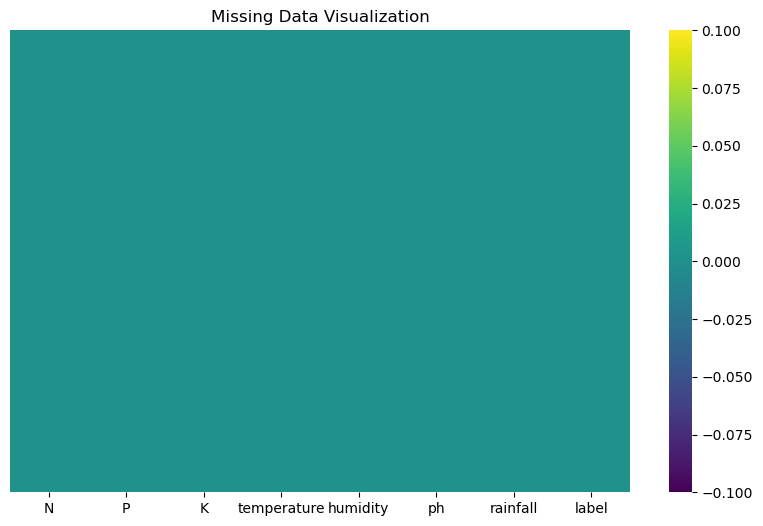

<Figure size 1500x1000 with 0 Axes>

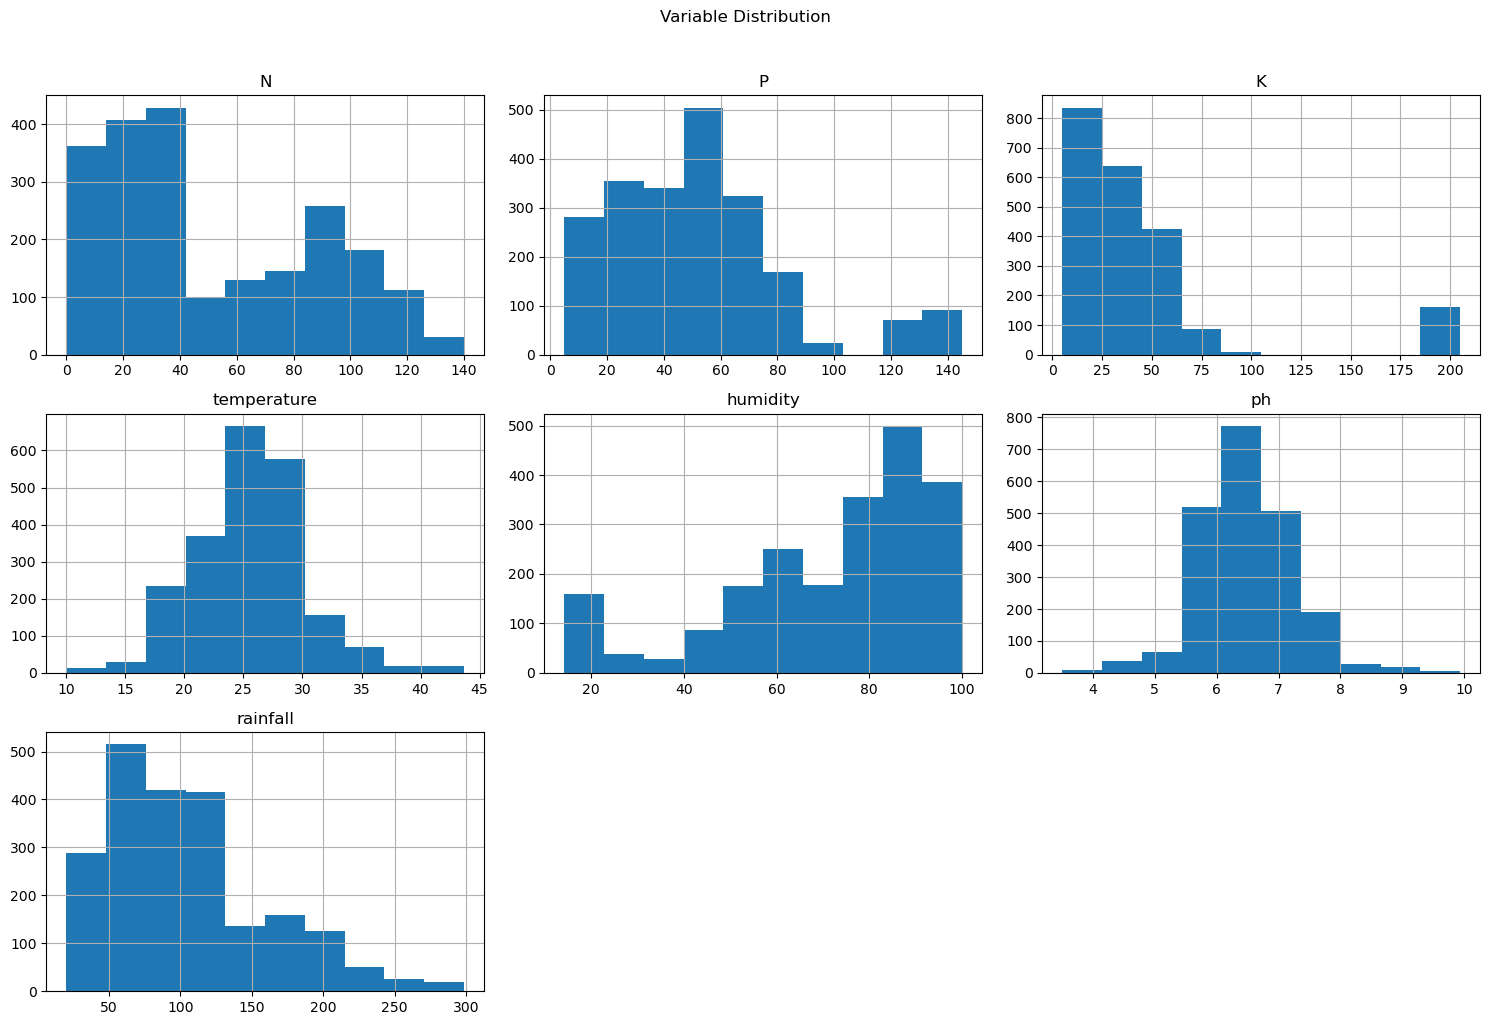

In [3]:
# Missing data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Variable distribution
features = df.drop("label", axis=1)
plt.figure(figsize=(15, 10))
features.hist(figsize=(15, 10))
plt.suptitle('Variable Distribution', y=1.02)
plt.tight_layout()
plt.show()

features = df.drop("label", axis=1)


In [4]:
# Detecting duplicates
if not df.duplicated().any():
    print("There are no duplicates in the dataset.")
else:
    print("Duplicate data exists in the dataset.")

There are no duplicates in the dataset.


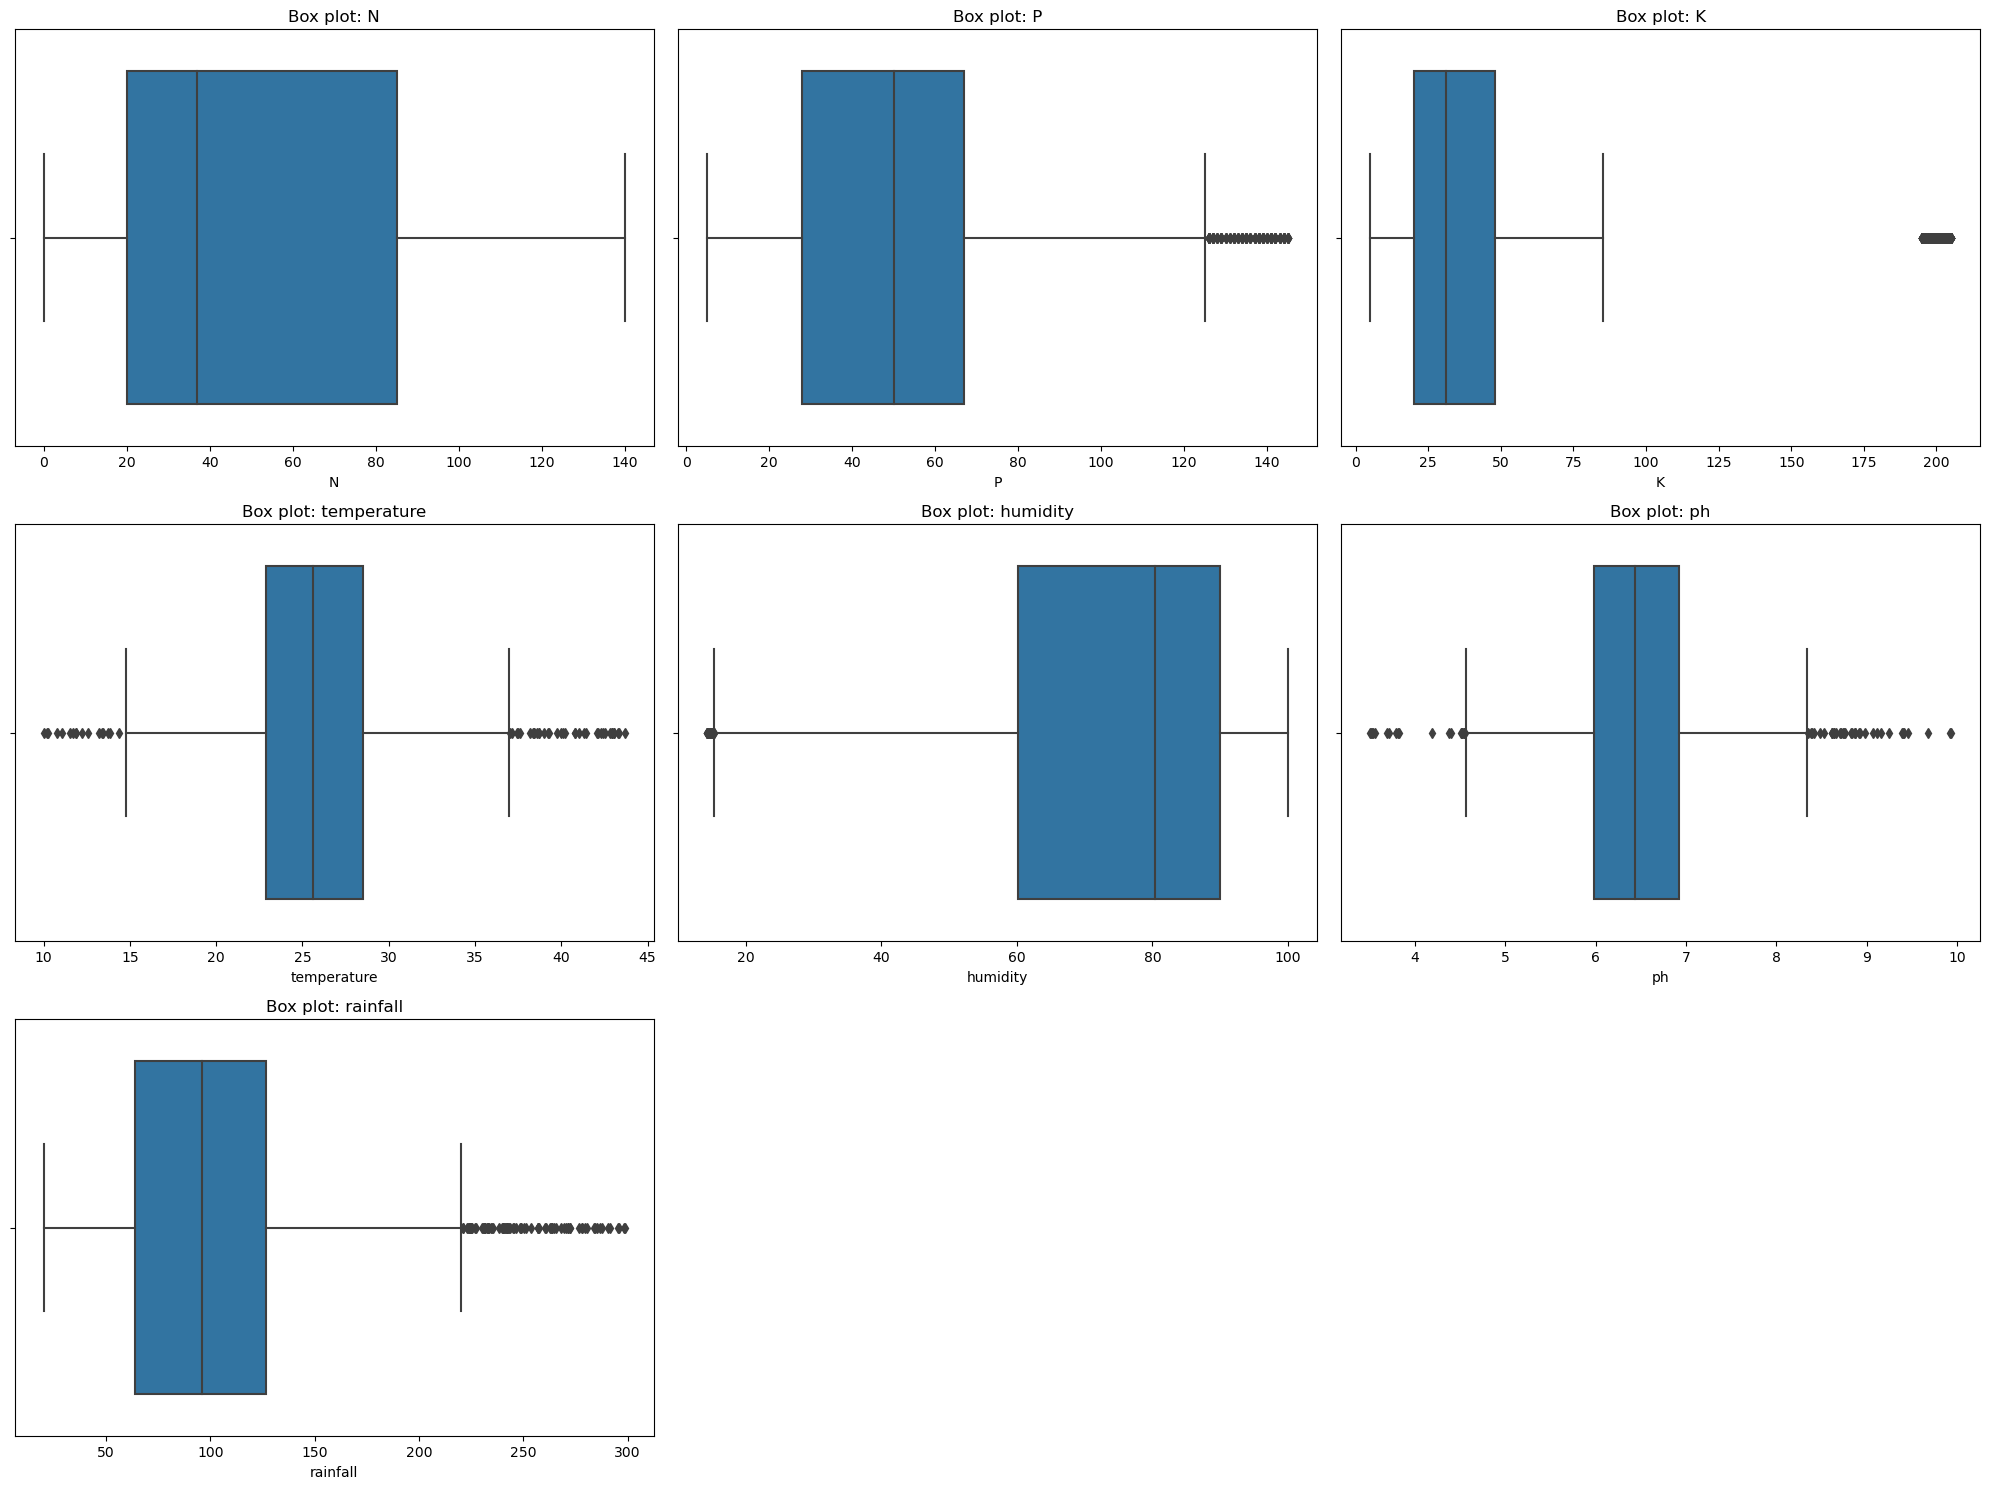

In [5]:
# box plot
n = len(features.columns)
rows = n // 3 + (1 if n % 3 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

if n % 3:
    for idx in range(n % 3, 3):
        fig.delaxes(axes[rows-1][idx])

for idx, column in enumerate(features.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    sns.boxplot(x=features[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Box plot: {column}')

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# label encoding
df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes


X = df.drop(["label", "label_code"], axis=1)
y = df['label_code']


label_mapping = pd.DataFrame({
    'label': df['label'],
    'label_code': df['label_code']
})

label_mapping = label_mapping.drop_duplicates()

label_mapping = label_mapping.sort_values('label_code').reset_index(drop=True)

print(label_mapping)


          label  label_code
0         apple           0
1        banana           1
2     blackgram           2
3      chickpea           3
4       coconut           4
5        coffee           5
6        cotton           6
7        grapes           7
8          jute           8
9   kidneybeans           9
10       lentil          10
11        maize          11
12        mango          12
13    mothbeans          13
14     mungbean          14
15    muskmelon          15
16       orange          16
17       papaya          17
18   pigeonpeas          18
19  pomegranate          19
20         rice          20
21   watermelon          21


In [7]:
# train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardzation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())
X_test_scaled = scaler.transform(X_test)


          N         P         K  temperature  humidity        ph  rainfall
0 -1.073706 -1.127233 -0.312384     0.924979 -0.927217 -0.478003 -0.214794
1 -0.856807 -0.518725 -0.312384     0.913615 -0.966196 -1.044822 -0.143243
2 -1.209267 -0.710885 -0.037969    -1.241933  0.789548 -0.960304 -0.021834
3 -0.341672  0.345996 -0.523473    -0.379922 -0.437658  0.246597 -0.923585
4  1.583304 -1.031152  0.194229     0.497863  0.875540  0.120721 -1.493559


<Figure size 1000x700 with 0 Axes>

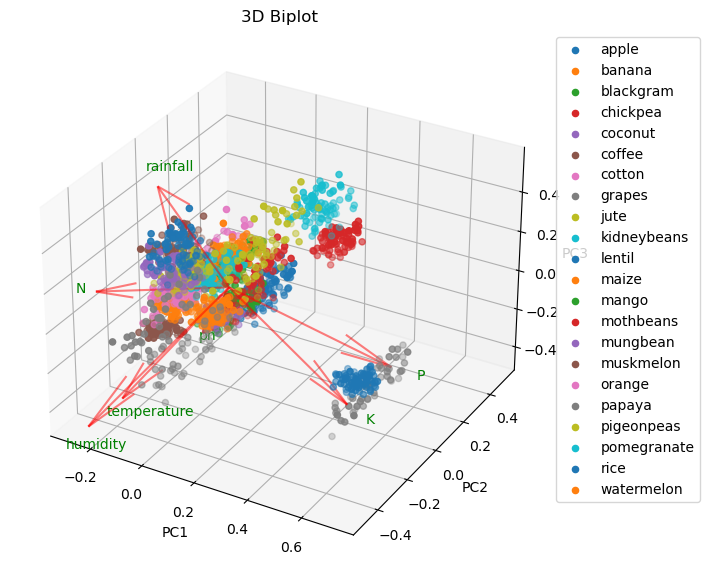

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

def biplot_3d(score, coeff, labels=None, colors=None, unique_labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    zs = score[:, 2]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    scalez = 1.0 / (zs.max() - zs.min())

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if unique_labels is not None:
        for label in unique_labels:
            idx = np.where(colors == label)
            ax.scatter(xs[idx] * scalex, ys[idx] * scaley, zs[idx] * scalez, label=df[df['label_code'] == label]['label'].iloc[0])
    else:
        ax.scatter(xs * scalex, ys * scaley, zs * scalez, c=colors, cmap='Set3')

    for i in range(n):
        ax.quiver(0, 0, 0, coeff[i, 0], coeff[i, 1], coeff[i, 2], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff[i, 2] * 1.15, "Var" + str(i + 1), color='g')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff[i, 2] * 1.15, labels[i], color='g')

    if unique_labels is not None:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.title("3D Biplot")
    plt.show()


pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(X_train_scaled)

unique_labels = np.unique(y_train) 

plt.figure(figsize=(10, 7))
biplot_3d(pca_result_3d, np.transpose(pca_3d.components_[0:3, :]), labels=X_train.columns, colors=y_train, unique_labels=unique_labels)


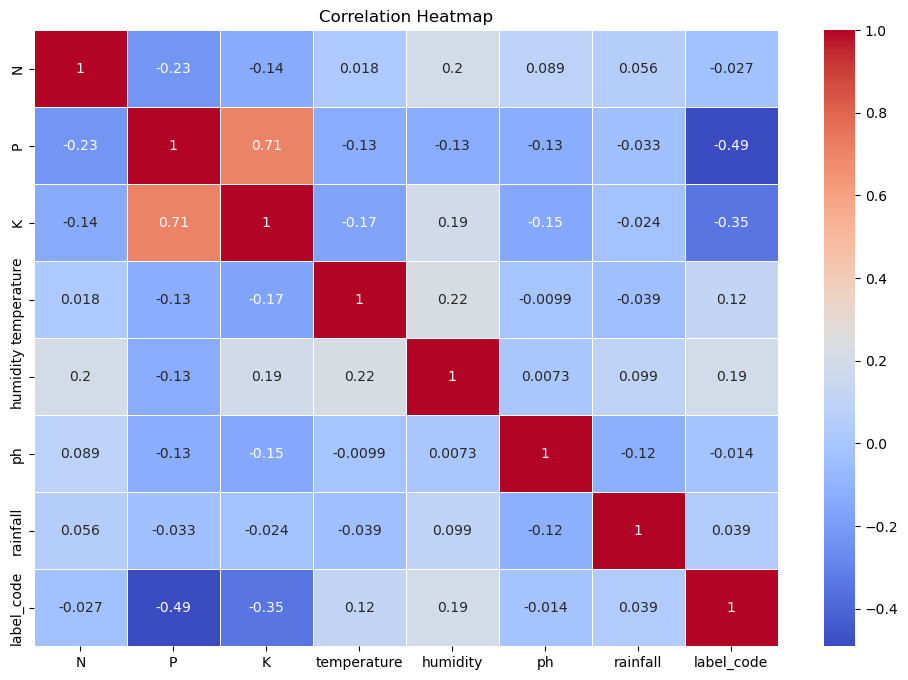

('Correlation with label_code:',
 N             -0.027191
 P             -0.490786
 K             -0.346673
 temperature    0.118962
 humidity       0.194701
 ph            -0.014055
 rainfall       0.039037
 label_code     1.000000
 Name: label_code, dtype: float64)

In [9]:
# correlation (heat map)
correlation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


label_correlation_annotated = ("Correlation with label_code:", correlation['label_code'])

label_correlation_annotated

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

dt_model = DecisionTreeClassifier(
    #max_depth=100,               
    #min_samples_leaf=1,          
    #min_samples_split=2,        
    #max_leaf_nodes=15,           
    random_state=42
)

dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Model:", accuracy)

Accuracy of Decision Tree Model: 0.9884259259259259


In [11]:
from sklearn.model_selection import cross_val_score

k = 5

cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=k)

print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-validation scores for each fold: [0.99130435 0.9826087  0.97971014 0.99130435 0.99127907]
Mean CV Score: 0.9872413211998652


In [12]:
train_sizes_2, train_scores_2, validation_scores_2 = learning_curve(
    dt_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=10, scoring='accuracy'
)
train_scores_mean_2 = np.mean(train_scores_2, axis=1)
validation_scores_mean_2 = np.mean(validation_scores_2, axis=1)

#plt.figure(figsize=(10, 6))
#plt.plot(train_sizes_2, train_scores_mean_2, 'o-', color="r", label="Training score")
#plt.plot(train_sizes_2, validation_scores_mean_2, 'o-', color="g", label="Cross-validation score")
#plt.title("Learning Curve for Decision Tree Model")
#plt.xlabel("Training examples")
#plt.ylabel("Score")
#plt.legend(loc="best")
#plt.show()


In [13]:
comparison_array = np.column_stack((y_test, y_pred))
print(comparison_array)

[[14 14]
 [15 15]
 [11 11]
 [ 9  9]
 [19 19]
 [13 13]
 [ 3  3]
 [ 3  3]
 [ 2  2]
 [18 18]
 [ 4  4]
 [ 4  4]
 [10 10]
 [18 18]
 [20 20]
 [21 21]
 [ 5  5]
 [19 19]
 [ 7  7]
 [13 13]
 [10 10]
 [15 15]
 [ 0  0]
 [14 14]
 [ 9  9]
 [20 20]
 [13 13]
 [ 8  8]
 [ 8  8]
 [ 9  9]
 [12 12]
 [11 11]
 [ 3  3]
 [17 17]
 [11 11]
 [ 7  7]
 [11 11]
 [14 14]
 [16 16]
 [ 4  4]
 [13 13]
 [17 17]
 [ 9  9]
 [ 4  4]
 [ 4  4]
 [ 5  5]
 [11 11]
 [21 21]
 [18 18]
 [14 14]
 [19 19]
 [11 11]
 [16 16]
 [15 15]
 [ 5  5]
 [ 5  5]
 [ 3  3]
 [13 13]
 [15 15]
 [ 6  6]
 [ 3  3]
 [18 18]
 [11 11]
 [10 10]
 [ 9  9]
 [15 15]
 [ 6  6]
 [ 3  3]
 [15 15]
 [ 0  0]
 [ 4  4]
 [ 6  6]
 [ 1  1]
 [ 4  4]
 [12 12]
 [ 0  0]
 [10 10]
 [14 14]
 [ 2  2]
 [ 5  5]
 [ 9  9]
 [20 20]
 [13 13]
 [12 12]
 [11 11]
 [21 21]
 [ 1  1]
 [15 15]
 [19 19]
 [19 19]
 [21 21]
 [17 17]
 [11 11]
 [ 6  6]
 [ 6  6]
 [ 9  9]
 [ 0  0]
 [16 16]
 [13 13]
 [ 8  8]
 [ 3  3]
 [ 9  9]
 [12 12]
 [15 15]
 [14 14]
 [18 18]
 [ 7  7]
 [ 4  4]
 [ 3  3]
 [21 21]
 [18 18]
 

In [14]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# F1
f1 = f1_score(y_test, y_pred, average='macro') 
print("F1 Score:", f1)

F1 Score: 0.9870607730907107


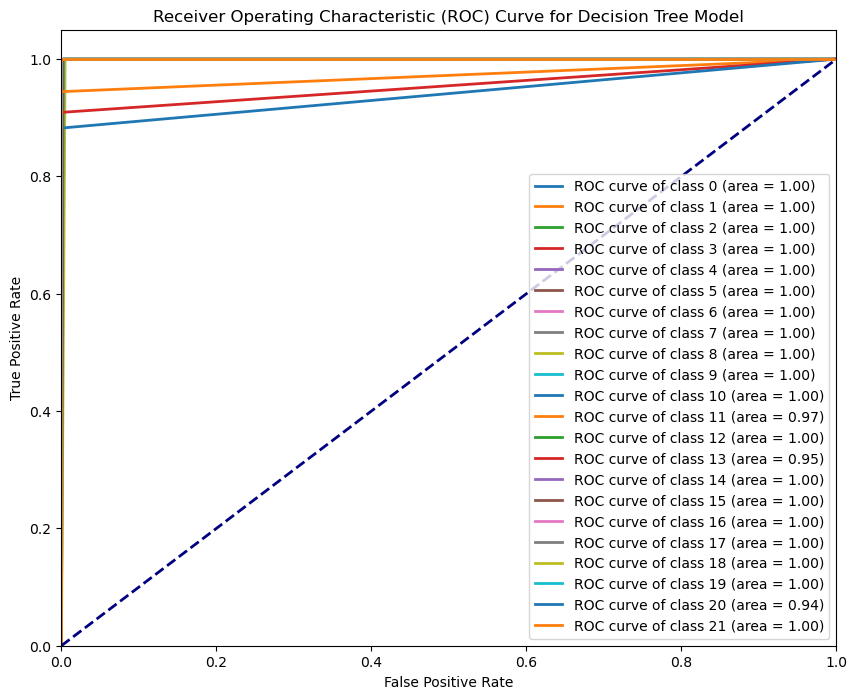

In [15]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

y_score_dt = dt_model.predict_proba(X_test_scaled)

n_classes = y_test_bin.shape[1]

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dt[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Model')
plt.legend(loc="lower right")
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [17]:
overlap = X_test.isin(X_train).all(axis=1).any()
print("The test set contains data from the training set:" if overlap else "The test set does not contain data from the training set.")


The test set does not contain data from the training set.


In [18]:
import ipywidgets as widgets
from IPython.display import display


input_widgets = []
for column in X_train.columns:
    input_widgets.append(widgets.FloatText(
        value=0.0,
        description=column,
        disabled=False
    ))


predict_button = widgets.Button(description="Recommend")


output = widgets.Output()

def on_predict_button_clicked(b):
  
    input_data = [w.value for w in input_widgets if hasattr(w, 'value')]

    input_df = pd.DataFrame([input_data], columns=X_train.columns)

    input_df_scaled = scaler.transform(input_df)

    prediction = dt_model.predict(input_df_scaled)

    predicted_class = label_mapping[label_mapping['label_code'] == prediction[0]]['label'].values[0]

    with output:
        output.clear_output()
        print(f"Crop： {predicted_class}")


predict_button.on_click(on_predict_button_clicked)


input_widgets.append(predict_button)
input_widgets.append(output)
display(*input_widgets)


FloatText(value=0.0, description='N')

FloatText(value=0.0, description='P')

FloatText(value=0.0, description='K')

FloatText(value=0.0, description='temperature')

FloatText(value=0.0, description='humidity')

FloatText(value=0.0, description='ph')

FloatText(value=0.0, description='rainfall')

Button(description='Recommend', style=ButtonStyle())

Output()